In [407]:
from __future__ import print_function, division, absolute_import
from os import path
import glob
import pprint
import numpy as np                # numerical analysis linear algebra
import pandas as pd
import matplotlib.pyplot as plt   # plotting
import tables
import h5py
import csv
import ipywidgets as wg
from IPython.display import display
from numpy.random import randint

In [457]:
# load the dataset
f=h5py.File('data/PVC-7/concat_31Hz.h5','r')
ls = list(f)
print('List of datasets in this file: \n',ls)
dset = f['data']
print('dset',dset.shape)

# f.close()

List of datasets in this file: 
 ['data']
dset (255256, 512, 1154)


In [410]:
# open the stimulus.csv as integer

df = pd.read_csv('data/PVC-7/122008_140124_windowmix/stimulus.csv').astype(int)
df.columns = ["start","end","ori","sf","tf","contrast"]
stimuli = np.array(df[["start","end","ori","sf","tf","contrast"]])
print(stimuli)
stimuli.dtype
stimuli.shape

# stimlist = []
# with open('data/PVC-7/122008_140124_windowmix/stimulus.csv','r') as csvfile:
#     reader = csv.reader(csvfile,  delimiter=',', quotechar='|') 
#     for row in reader: # each row is a list
#         stimlist.append(row)


[[ 31141  31231      0      0      1      0]
 [ 86248  86338      0      0      1      0]
 [ 87900  87990      0      0      1      0]
 ...
 [ 87750  87840    315      0     15      0]
 [198865 198955    315      0     15      0]
 [213881 213971    315      0     15      0]]


(1600, 6)

In [456]:
# pick a ROI: create a slider to view the whole field
def imaging(frame):
    singleframe = dset[frame, 60:400,100:600]
    plt.imshow(singleframe)
    
f_slide=wg.IntSlider(min=0, max=255255, value=0,description = 'Frame')
wg.interact(imaging,frame=f_slide)

interactive(children=(IntSlider(value=0, description='Frame', max=255255), Output()), _dom_classes=('widget-in…

<function __main__.imaging(frame)>

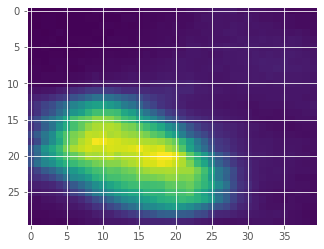

In [452]:
# pick a ROI: find the cell
smalldset1000z1 = np.mean(dset[10000:13000,120:150,320:360],axis=0)
smalldset1000z1.shape
plt.imshow(smalldset1000z1)

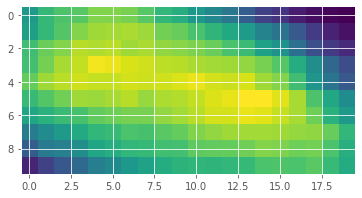

In [453]:
# pick a ROI: zoom in. The rectangle matrix is defined as ROI.
smalldset1000z1 = np.mean(dset[10000:13000,135:145,325:345],axis=0)
smalldset1000z1.shape
plt.imshow(smalldset1000z1)

In [272]:
# define the function to aquire df/f for a neuron [jstart:jend,kstart:kend]
def dff_results(jstart,jend,kstart,kend):
    dff_mean_all= []
    for stimrow in stimuli[:,0]:
        F0=np.mean(dset[(stimrow-30):stimrow,jstart:jend,kstart:kend],axis=0)# baseline response: for each pixel, average across frames. 2D matrix
        F=np.mean(dset[stimrow:(stimrow+90),jstart:jend,kstart:kend],axis=0)# stumulus response: for each pixel, average across frames. 2D matrix
        dff = (F-F0)/F0 # 2D matrix
        dff_mean = np.mean(dff)# one df/f for each trial
        dff_mean_all = np.append(dff_mean_all,dff_mean)# an array of df/f for 1600 trials
    return dff_mean_all


In [ ]:
# create stimuli sets for spatial frequency and temporal frequency
sfset = [0.02,0.04,0.08,0.16,0.32]
tfset = [1,2,4,8,15]

In [425]:
### Neuron 1
# create a dataframe for ROI 1 = [135:145,325:345]. shape=(1600,7)

DFneuron1 = pd.read_csv('data/PVC-7/122008_140124_windowmix/stimulus.csv')
DFneuron1.insert(6,'dff',dff_results(135,145,325,345)) 
DF = DFneuron1
print(DF)

       start     end  ori    sf  tf  contrast       dff
0      31141   31231    0  0.02   1       0.8 -0.058822
1      86248   86338    0  0.02   1       0.8  0.043043
2      87900   87990    0  0.02   1       0.8 -0.112730
3     112976  113066    0  0.02   1       0.8  0.015696
4     132196  132286    0  0.02   1       0.8 -0.011235
...      ...     ...  ...   ...  ..       ...       ...
1595   64175   64265  315  0.32  15       0.8 -0.021169
1596   70632   70722  315  0.32  15       0.8  0.030351
1597   87750   87840  315  0.32  15       0.8 -0.087927
1598  198865  198955  315  0.32  15       0.8 -0.019345
1599  213881  213971  315  0.32  15       0.8 -0.075346

[1600 rows x 7 columns]


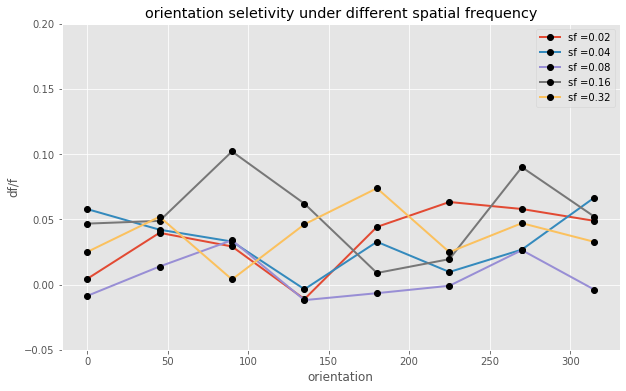

In [398]:
# orientation tuning under different spatial frequency, merged across temporal frequency

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    tempsf = sfset[i]
    sub_sf = DF.loc[DF['sf']==tempsf].groupby(df['ori']).mean()
    plt.plot(sub_sf.ori,sub_sf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'sf ='+str(tempsf))

plt.title('orientation seletivity under different spatial frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

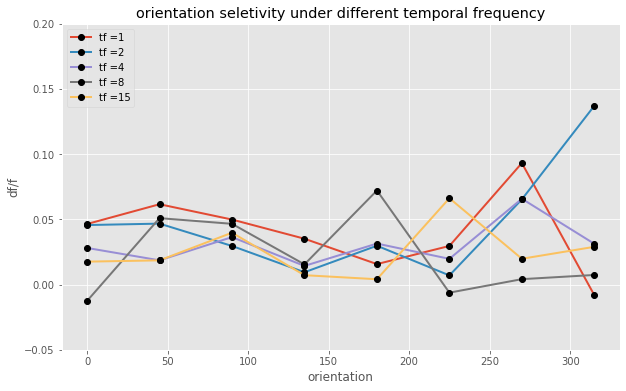

In [400]:
# orientation tuning under different tf, merged across sf

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    temptf = tfset[i]
    sub_tf = DF.loc[DF['tf']==temptf].groupby(df['ori']).mean()
    plt.plot(sub_tf.ori,sub_tf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'tf ='+str(temptf))  

plt.title('orientation seletivity under different temporal frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

In [401]:
# create a grouped dataframe for the neuron to plot the example cell figure under 5sf*5tf
groupedDF = DF.groupby(['tf','sf','ori']).mean()['dff'].reset_index()
print(groupedDF)

     tf    sf  ori       dff
0     1  0.02    0 -0.030183
1     1  0.02   45  0.117044
2     1  0.02   90  0.041108
3     1  0.02  135 -0.038408
4     1  0.02  180  0.008886
..   ..   ...  ...       ...
195  15  0.32  135  0.132602
196  15  0.32  180 -0.003241
197  15  0.32  225  0.031200
198  15  0.32  270  0.024041
199  15  0.32  315 -0.049829

[200 rows x 4 columns]


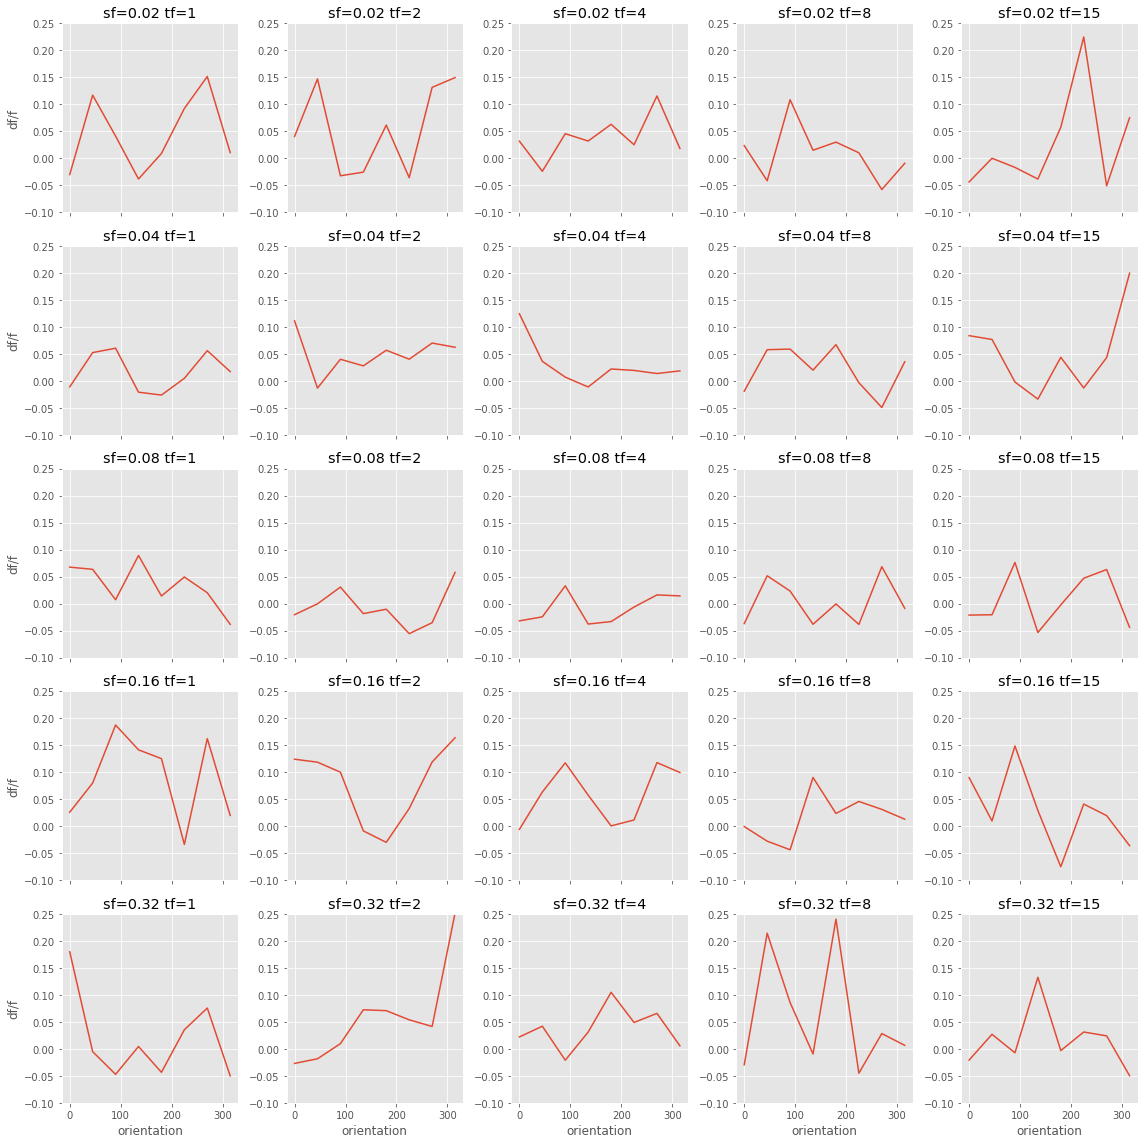

In [431]:
# plot orientation tuning under 5 sf * 5 tf
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, figsize=(16, 16))
for i in np.arange(5):
    tempsf=sfset[i]
    for j in np.arange(5):
        temptf=tfset[j]
        axes[i,j].plot(grouped_tso.loc[grouped_tso['sf']==tempsf].loc[grouped_tso['tf']==temptf]['ori'], 
                       grouped_tso.loc[grouped_tso['sf']==tempsf].loc[grouped_tso['tf']==temptf]['dff'])
        axes[i,j].set_ylim(-0.1,0.25)
        axes[i,j].set_title('sf='+str(tempsf)+' tf='+str(temptf))
        for m, row in enumerate(axes):
            for n, col in enumerate(row):
                if col.is_last_row():
                    col.set_xlabel('orientation')
                if col.is_first_col():
                    col.set_ylabel('df/f')

                    
plt.tight_layout()

In [427]:
### Neuron 2
# create a dataframe for ROI = [168:181,315:333]. shape=(1600,7)

DFneuron2 = pd.read_csv('data/PVC-7/122008_140124_windowmix/stimulus.csv')
DFneuron2.insert(6,'dff',dff_results(168,181,315,333)) 
# this is the example set. change to variable dff_results(jstart,jend,kstart,kend) for submission.
DF = DFneuron2
print(DF)

       start     end  ori    sf  tf  contrast       dff
0      31141   31231    0  0.02   1       0.8  1.137547
1      86248   86338    0  0.02   1       0.8  0.018805
2      87900   87990    0  0.02   1       0.8  0.032159
3     112976  113066    0  0.02   1       0.8  0.263300
4     132196  132286    0  0.02   1       0.8  0.030344
...      ...     ...  ...   ...  ..       ...       ...
1595   64175   64265  315  0.32  15       0.8  0.001217
1596   70632   70722  315  0.32  15       0.8 -0.003551
1597   87750   87840  315  0.32  15       0.8 -0.036047
1598  198865  198955  315  0.32  15       0.8  0.185489
1599  213881  213971  315  0.32  15       0.8 -0.019453

[1600 rows x 7 columns]


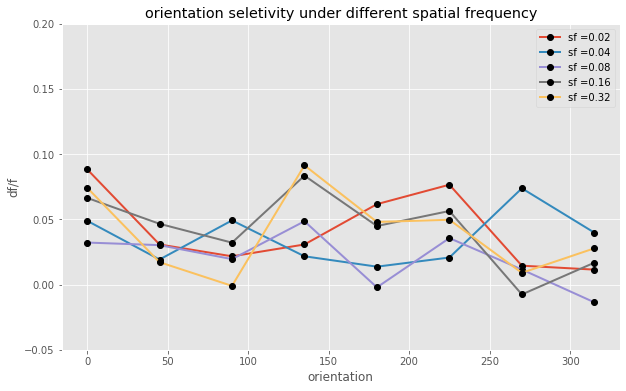

In [428]:
# orientation tuning under different sf, merged across tf

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    tempsf = sfset[i]
    sub_sf = DF.loc[DF['sf']==tempsf].groupby(df['ori']).mean()
    plt.plot(sub_sf.ori,sub_sf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'sf ='+str(tempsf))

plt.title('orientation seletivity under different spatial frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

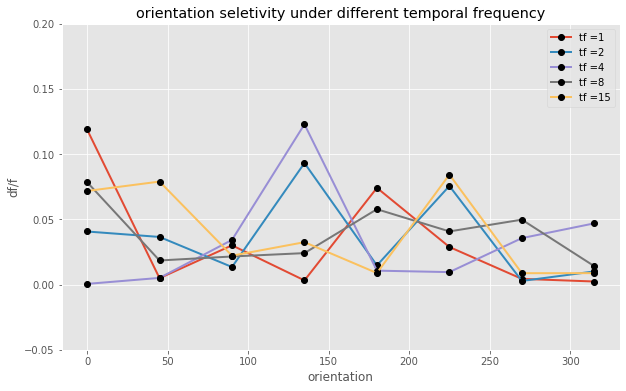

In [429]:
# orientation tuning under different tf, merged across sf

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    temptf = tfset[i]
    sub_tf = DF.loc[DF['tf']==temptf].groupby(df['ori']).mean()
    plt.plot(sub_tf.ori,sub_tf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'tf ='+str(temptf))  

plt.title('orientation seletivity under different temporal frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

In [432]:
# create a grouped dataframe for the neuron to plot the example cell figure under 5sf*5tf
groupedDF = DF.groupby(['tf','sf','ori']).mean()['dff'].reset_index()
print(groupedDF)

     tf    sf  ori       dff
0     1  0.02    0  0.193308
1     1  0.02   45 -0.004506
2     1  0.02   90  0.015149
3     1  0.02  135 -0.049573
4     1  0.02  180  0.039540
..   ..   ...  ...       ...
195  15  0.32  135  0.016436
196  15  0.32  180  0.029052
197  15  0.32  225  0.087224
198  15  0.32  270  0.066059
199  15  0.32  315 -0.002088

[200 rows x 4 columns]


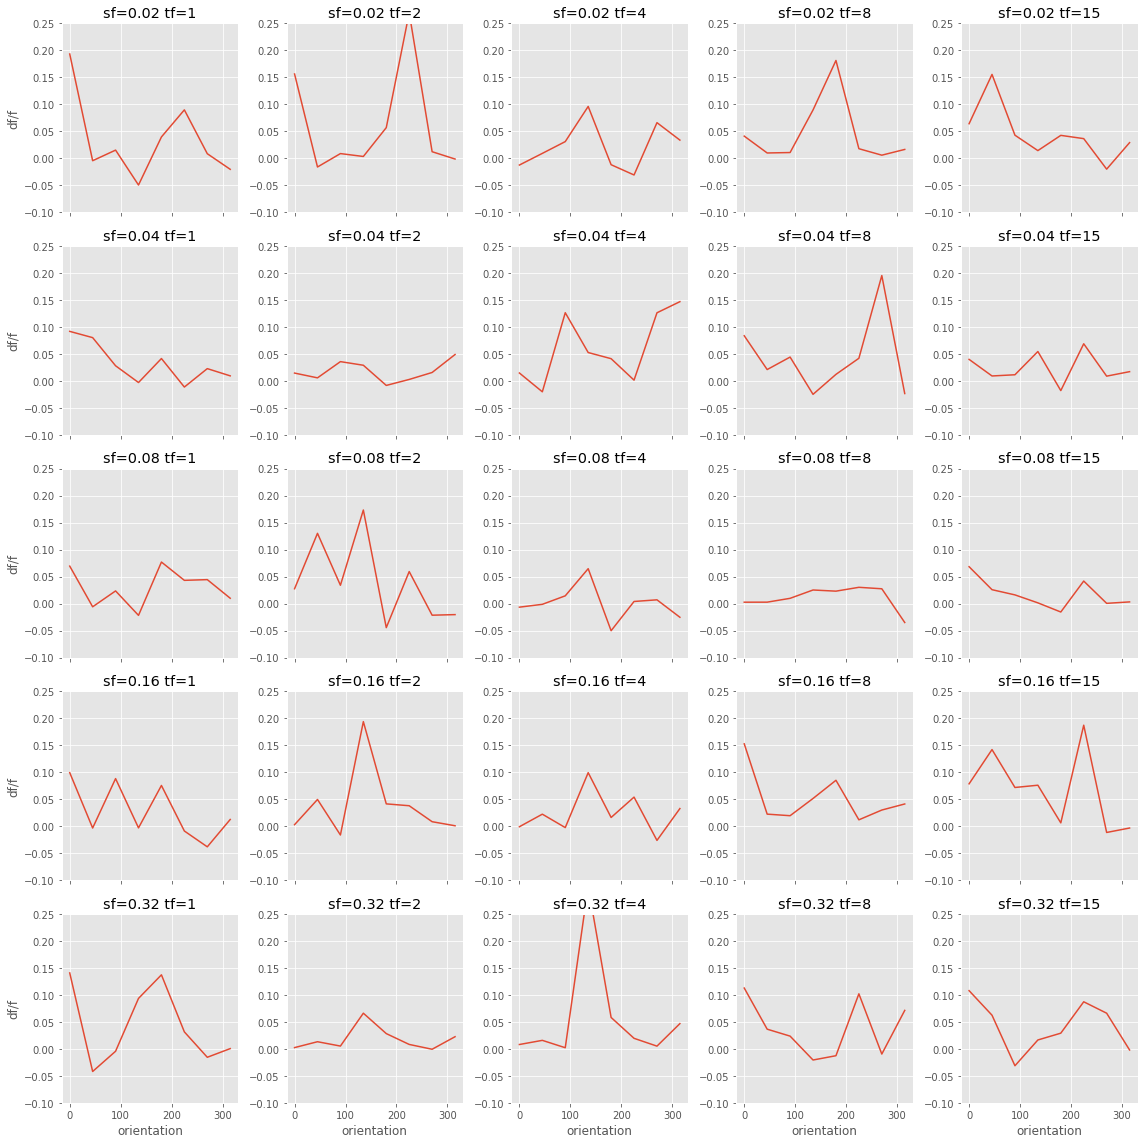

In [434]:
# plot orientation tuning under 5 sf * 5 tf
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, figsize=(16, 16))
for i in np.arange(5):
    tempsf=sfset[i]
    for j in np.arange(5):
        temptf=tfset[j]
        axes[i,j].plot(groupedDF.loc[grouped_tso['sf']==tempsf].loc[groupedDF['tf']==temptf]['ori'], 
                       groupedDF.loc[grouped_tso['sf']==tempsf].loc[groupedDF['tf']==temptf]['dff'])
        axes[i,j].set_ylim(-0.1,0.25)
        axes[i,j].set_title('sf='+str(tempsf)+' tf='+str(temptf))
        for m, row in enumerate(axes):
            for n, col in enumerate(row):
                if col.is_last_row():
                    col.set_xlabel('orientation')
                if col.is_first_col():
                    col.set_ylabel('df/f')

                    
plt.tight_layout()

In [435]:
### Neuron 3
# create a dataframe for ROI = [342:355,255:272]. shape=(1600,7)

DFneuron1 = pd.read_csv('data/PVC-7/122008_140124_windowmix/stimulus.csv')
DFneuron1.insert(6,'dff',dff_results(342,355,255,272)) 
# this is the example set. change to variable dff_results(jstart,jend,kstart,kend) for submission.
DF = DFneuron1
print(DF)

       start     end  ori    sf  tf  contrast       dff
0      31141   31231    0  0.02   1       0.8  0.007515
1      86248   86338    0  0.02   1       0.8  0.073564
2      87900   87990    0  0.02   1       0.8  0.036409
3     112976  113066    0  0.02   1       0.8  0.054007
4     132196  132286    0  0.02   1       0.8  0.031704
...      ...     ...  ...   ...  ..       ...       ...
1595   64175   64265  315  0.32  15       0.8  0.040152
1596   70632   70722  315  0.32  15       0.8  0.055358
1597   87750   87840  315  0.32  15       0.8  0.078067
1598  198865  198955  315  0.32  15       0.8  0.026731
1599  213881  213971  315  0.32  15       0.8  0.061398

[1600 rows x 7 columns]


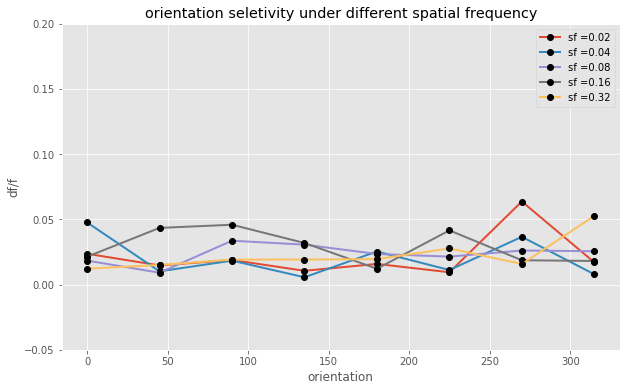

In [436]:
# orientation tuning under different sf, merged across tf

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    tempsf = sfset[i]
    sub_sf = DF.loc[DF['sf']==tempsf].groupby(df['ori']).mean()
    plt.plot(sub_sf.ori,sub_sf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'sf ='+str(tempsf))

plt.title('orientation seletivity under different spatial frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

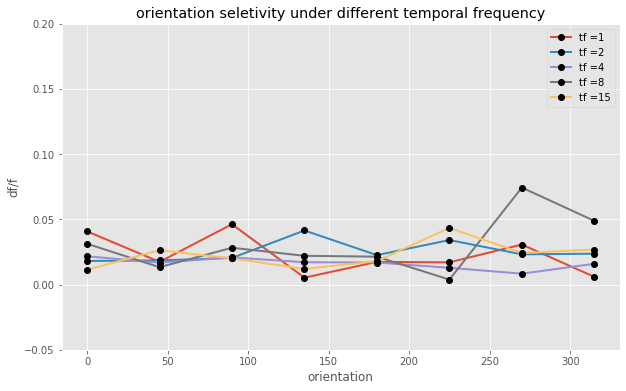

In [437]:
# orientation tuning under different tf, merged across sf

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    temptf = tfset[i]
    sub_tf = DF.loc[DF['tf']==temptf].groupby(df['ori']).mean()
    plt.plot(sub_tf.ori,sub_tf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'tf ='+str(temptf))  

plt.title('orientation seletivity under different temporal frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

In [438]:
# create a grouped dataframe for the neuron to plot the example cell figure under 5sf*5tf
groupedDF = DF.groupby(['tf','sf','ori']).mean()['dff'].reset_index()
print(groupedDF)

     tf    sf  ori       dff
0     1  0.02    0  0.025781
1     1  0.02   45  0.022269
2     1  0.02   90  0.019743
3     1  0.02  135  0.006566
4     1  0.02  180  0.032005
..   ..   ...  ...       ...
195  15  0.32  135  0.014671
196  15  0.32  180  0.015021
197  15  0.32  225  0.023896
198  15  0.32  270  0.023905
199  15  0.32  315  0.031152

[200 rows x 4 columns]


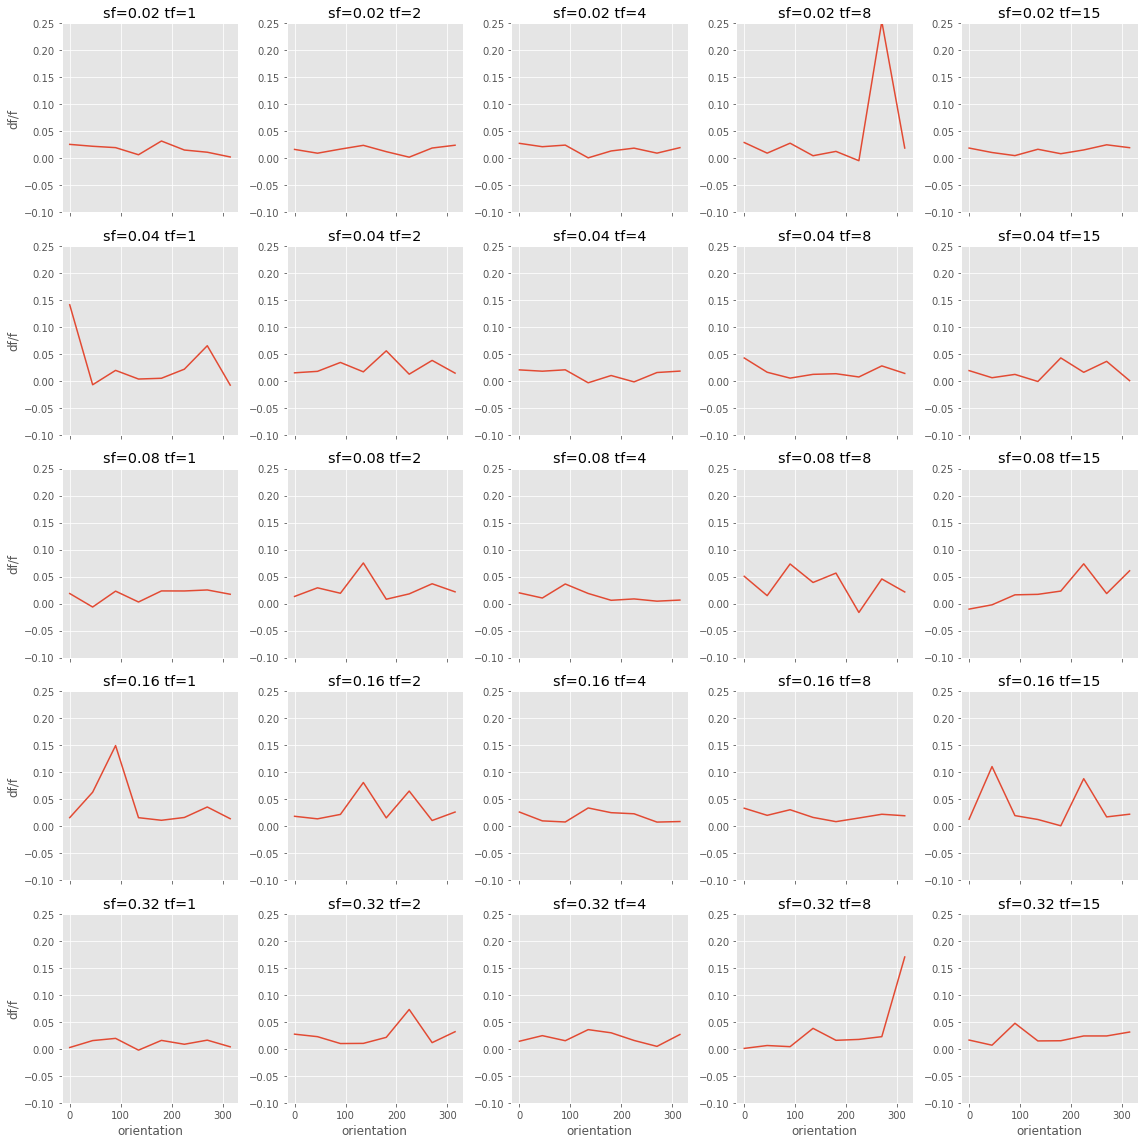

In [439]:
# plot orientation tuning under 5 sf * 5 tf
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, figsize=(16, 16))
for i in np.arange(5):
    tempsf=sfset[i]
    for j in np.arange(5):
        temptf=tfset[j]
        axes[i,j].plot(groupedDF.loc[grouped_tso['sf']==tempsf].loc[groupedDF['tf']==temptf]['ori'], 
                       groupedDF.loc[grouped_tso['sf']==tempsf].loc[groupedDF['tf']==temptf]['dff'])
        axes[i,j].set_ylim(-0.1,0.25)
        axes[i,j].set_title('sf='+str(tempsf)+' tf='+str(temptf))
        for m, row in enumerate(axes):
            for n, col in enumerate(row):
                if col.is_last_row():
                    col.set_xlabel('orientation')
                if col.is_first_col():
                    col.set_ylabel('df/f')

                    
plt.tight_layout()

In [440]:
### Neuron 4
# create a dataframe for ROI = [242:255,365:382]. shape=(1600,7)

DFneuron1 = pd.read_csv('data/PVC-7/122008_140124_windowmix/stimulus.csv')
DFneuron1.insert(6,'dff',dff_results(242,255,365,382)) 
# this is the example set. change to variable dff_results(jstart,jend,kstart,kend) for submission.
DF = DFneuron1
print(DF)

       start     end  ori    sf  tf  contrast       dff
0      31141   31231    0  0.02   1       0.8  0.233785
1      86248   86338    0  0.02   1       0.8  0.015485
2      87900   87990    0  0.02   1       0.8  0.036286
3     112976  113066    0  0.02   1       0.8  0.008783
4     132196  132286    0  0.02   1       0.8 -0.060779
...      ...     ...  ...   ...  ..       ...       ...
1595   64175   64265  315  0.32  15       0.8 -0.123106
1596   70632   70722  315  0.32  15       0.8 -0.083756
1597   87750   87840  315  0.32  15       0.8  0.000836
1598  198865  198955  315  0.32  15       0.8  0.009792
1599  213881  213971  315  0.32  15       0.8 -0.052656

[1600 rows x 7 columns]


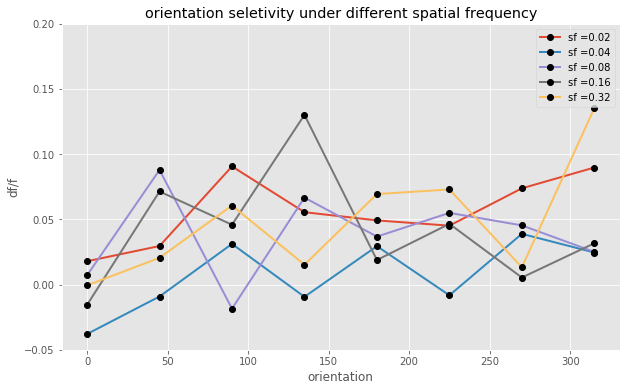

In [441]:
# orientation tuning under different sf, merged across tf

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    tempsf = sfset[i]
    sub_sf = DF.loc[DF['sf']==tempsf].groupby(df['ori']).mean()
    plt.plot(sub_sf.ori,sub_sf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'sf ='+str(tempsf))

plt.title('orientation seletivity under different spatial frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

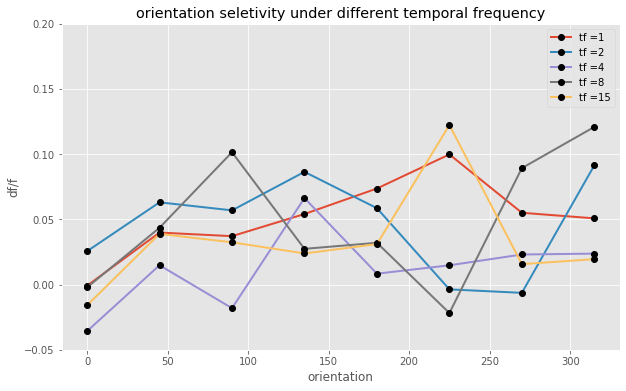

In [442]:
# orientation tuning under different tf, merged across sf

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    temptf = tfset[i]
    sub_tf = DF.loc[DF['tf']==temptf].groupby(df['ori']).mean()
    plt.plot(sub_tf.ori,sub_tf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'tf ='+str(temptf))  

plt.title('orientation seletivity under different temporal frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

In [444]:
# create a grouped dataframe for the neuron to plot the example cell figure under 5sf*5tf
groupedDF = DF.groupby(['tf','sf','ori']).mean()['dff'].reset_index()
print(groupedDF)

     tf    sf  ori       dff
0     1  0.02    0  0.027393
1     1  0.02   45 -0.014115
2     1  0.02   90  0.168431
3     1  0.02  135 -0.048184
4     1  0.02  180  0.145955
..   ..   ...  ...       ...
195  15  0.32  135  0.010386
196  15  0.32  180  0.149570
197  15  0.32  225  0.050661
198  15  0.32  270  0.004317
199  15  0.32  315 -0.054547

[200 rows x 4 columns]


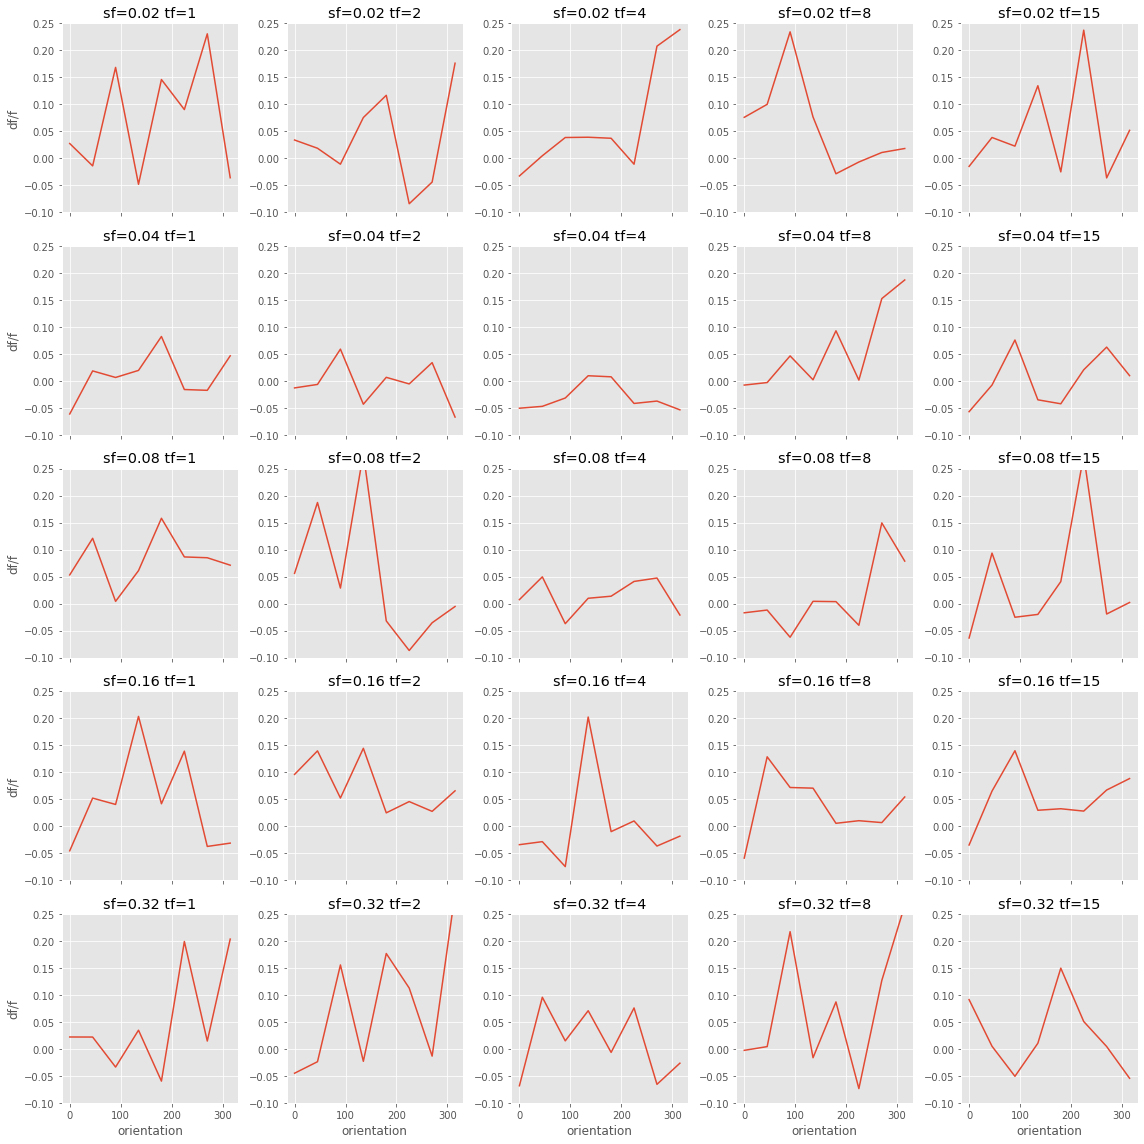

In [445]:
# plot orientation tuning under 5 sf * 5 tf
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, figsize=(16, 16))
for i in np.arange(5):
    tempsf=sfset[i]
    for j in np.arange(5):
        temptf=tfset[j]
        axes[i,j].plot(groupedDF.loc[grouped_tso['sf']==tempsf].loc[groupedDF['tf']==temptf]['ori'], 
                       groupedDF.loc[grouped_tso['sf']==tempsf].loc[groupedDF['tf']==temptf]['dff'])
        axes[i,j].set_ylim(-0.1,0.25)
        axes[i,j].set_title('sf='+str(tempsf)+' tf='+str(temptf))
        for m, row in enumerate(axes):
            for n, col in enumerate(row):
                if col.is_last_row():
                    col.set_xlabel('orientation')
                if col.is_first_col():
                    col.set_ylabel('df/f')

                    
plt.tight_layout()

In [446]:
### Neuron 5
# create a dataframe for ROI = [182:190,265:278]. shape=(1600,7)

DFneuron1 = pd.read_csv('data/PVC-7/122008_140124_windowmix/stimulus.csv')
DFneuron1.insert(6,'dff',dff_results(182,190,265,278)) 
# this is the example set. change to variable dff_results(jstart,jend,kstart,kend) for submission.
DF = DFneuron1
print(DF)

       start     end  ori    sf  tf  contrast       dff
0      31141   31231    0  0.02   1       0.8 -0.018464
1      86248   86338    0  0.02   1       0.8  0.053358
2      87900   87990    0  0.02   1       0.8  0.030931
3     112976  113066    0  0.02   1       0.8  0.075532
4     132196  132286    0  0.02   1       0.8 -0.016927
...      ...     ...  ...   ...  ..       ...       ...
1595   64175   64265  315  0.32  15       0.8 -0.011137
1596   70632   70722  315  0.32  15       0.8  0.052331
1597   87750   87840  315  0.32  15       0.8  0.056744
1598  198865  198955  315  0.32  15       0.8  0.021707
1599  213881  213971  315  0.32  15       0.8  0.022148

[1600 rows x 7 columns]


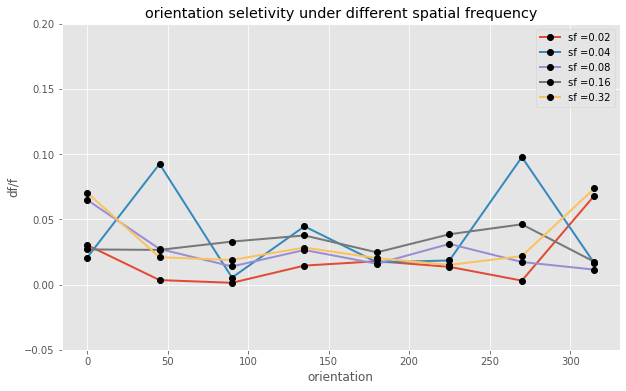

In [447]:
# orientation tuning under different sf, merged across tf

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    tempsf = sfset[i]
    sub_sf = DF.loc[DF['sf']==tempsf].groupby(df['ori']).mean()
    plt.plot(sub_sf.ori,sub_sf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'sf ='+str(tempsf))

plt.title('orientation seletivity under different spatial frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

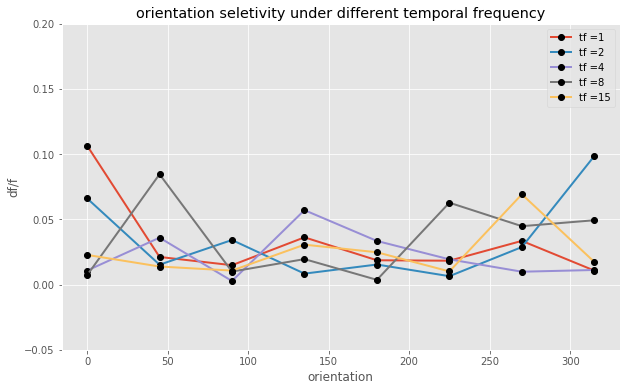

In [448]:
# orientation tuning under different tf, merged across sf

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    temptf = tfset[i]
    sub_tf = DF.loc[DF['tf']==temptf].groupby(df['ori']).mean()
    plt.plot(sub_tf.ori,sub_tf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'tf ='+str(temptf))  

plt.title('orientation seletivity under different temporal frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

In [449]:
# create a grouped dataframe for the neuron to plot the example cell figure under 5sf*5tf
groupedDF = DF.groupby(['tf','sf','ori']).mean()['dff'].reset_index()
print(groupedDF)

     tf    sf  ori       dff
0     1  0.02    0  0.019599
1     1  0.02   45  0.004089
2     1  0.02   90  0.009776
3     1  0.02  135  0.010426
4     1  0.02  180  0.017584
..   ..   ...  ...       ...
195  15  0.32  135  0.001520
196  15  0.32  180  0.048667
197  15  0.32  225  0.016360
198  15  0.32  270  0.013432
199  15  0.32  315  0.003861

[200 rows x 4 columns]


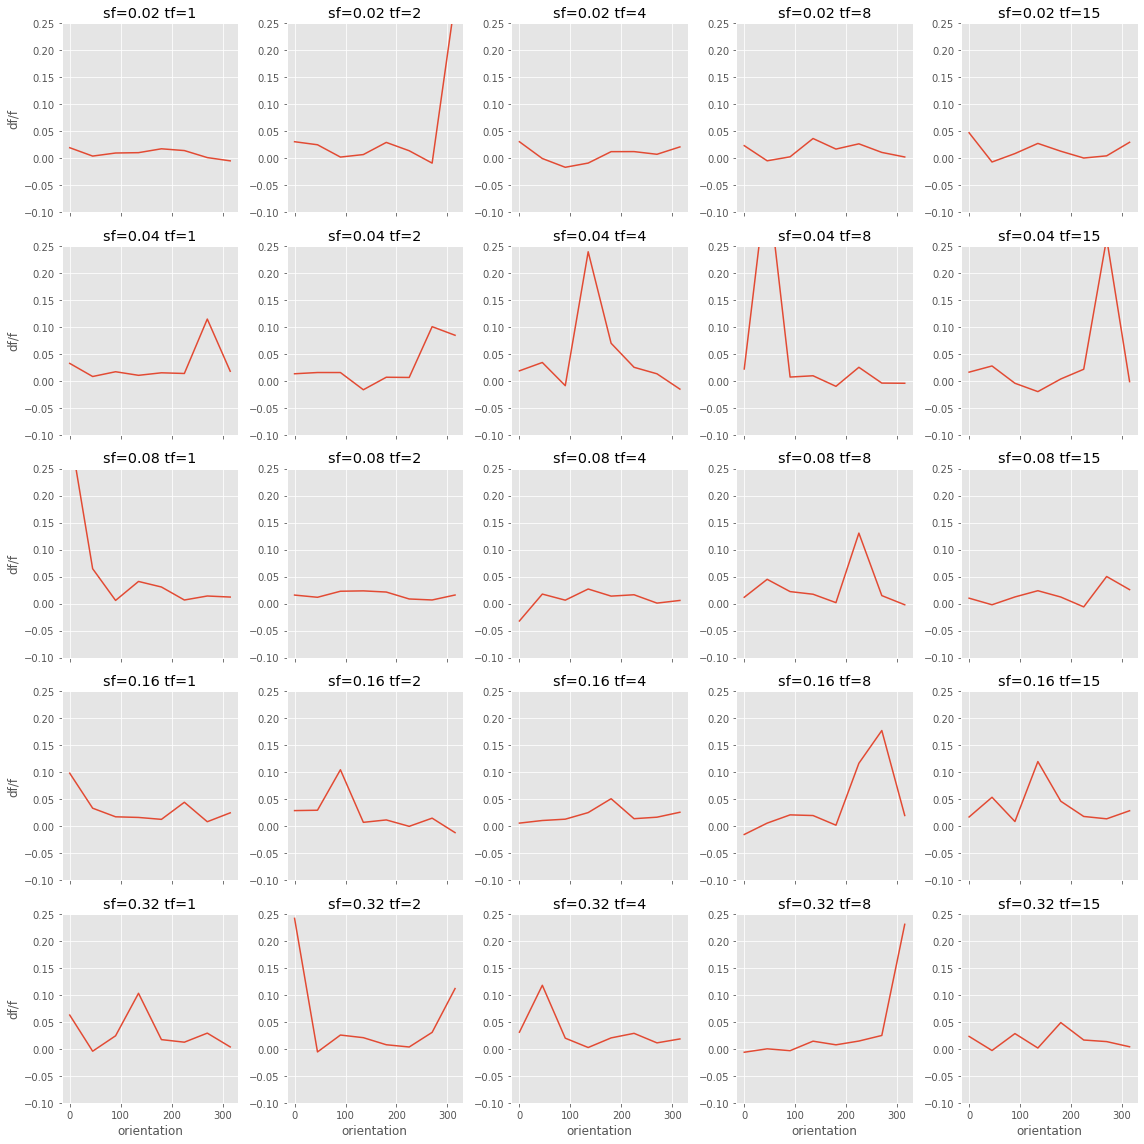

In [451]:
# plot orientation tuning under 5 sf * 5 tf
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, figsize=(16, 16))
for i in np.arange(5):
    tempsf=sfset[i]
    for j in np.arange(5):
        temptf=tfset[j]
        axes[i,j].plot(groupedDF.loc[grouped_tso['sf']==tempsf].loc[groupedDF['tf']==temptf]['ori'], 
                       groupedDF.loc[grouped_tso['sf']==tempsf].loc[groupedDF['tf']==temptf]['dff'])
        axes[i,j].set_ylim(-0.1,0.25)
        axes[i,j].set_title('sf='+str(tempsf)+' tf='+str(temptf))
        for m, row in enumerate(axes):
            for n, col in enumerate(row):
                if col.is_last_row():
                    col.set_xlabel('orientation')
                if col.is_first_col():
                    col.set_ylabel('df/f')

                    
plt.tight_layout()